In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Figure 6.1.a - Pg 62 top left

Notes: 
- Shade and eta are undefined
- using Shade = [500, 1000] and eta = 0.8, common paramters in later settings
- Shock Volume is undefined, using 500
- Reference uses Sell side shock only, I am including both Sell and Buy side shocks
- A lam value of 2e-4 produces results that better match the graphs. It doesn't technically specify what the lam value from the graph is, but the general default is 2e-3
- These results are generated with lam = 2e-3

Sell Side Shocks: 

Trial 1
AVG No shock surplus: 59.05010986328125
No shock surplusses:[tensor(59.0501)]

Trial 1
AVG Shock surplus: -14.534536361694336
Shock surplusses:[tensor(-14.5345)]

Trial 2
AVG No shock surplus: 126.87596130371094
No shock surplusses:[tensor(126.8760)]

Trial 2
AVG Shock surplus: 16.964012145996094
Shock surplusses:[tensor(16.9640)]

Trial 3
AVG No shock surplus: 54.38840866088867
No shock surplusses:[tensor(54.3884)]

Trial 3
AVG Shock surplus: 20.893447875976562
Shock surplusses:[tensor(20.8934)]

Trial 4
AVG No shock surplus: 85.11605072021484
No shock surplusses:[tensor(85.1161)]

Trial 4
AVG Shock surplus: 10.265847206115723
Shock surplusses:[tensor(10.2658)]

Trial 5
AVG No shock surplus: 48.66865921020508
No shock surplusses:[tensor(48.6687)]

Trial 5
AVG Shock surplus: 13.103297233581543
Shock surplusses:[tensor(13.1033)]

Trial 6
AVG No shock surplus: 133.23484802246094
No shock surplusses:[tensor(133.2348)]

Trial 6
AVG Shock surplus: 148.93174743652344
Shock surplusses

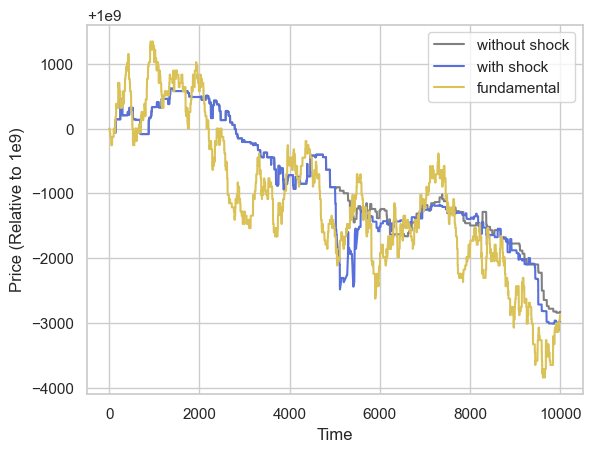

In [2]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"Trial {seed}")
    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")
    print()


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"Trial {seed}")
    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")
    print()


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.a/"

    # Show plot
    plt.savefig(base + f"6.1.a_{seed}_SELL.png")


Buy Side Shocks: 

Trial 1
AVG No shock surplus: 59.05010986328125
No shock surplusses:[tensor(59.0501)]

Trial 1
AVG Shock surplus: 26.012767791748047
Shock surplusses:[tensor(26.0128)]

Trial 2
AVG No shock surplus: 126.87596130371094
No shock surplusses:[tensor(126.8760)]

Trial 2
AVG Shock surplus: 63.104156494140625
Shock surplusses:[tensor(63.1042)]

Trial 3
AVG No shock surplus: 54.38840866088867
No shock surplusses:[tensor(54.3884)]

Trial 3
AVG Shock surplus: 8.731095314025879
Shock surplusses:[tensor(8.7311)]

Trial 4
AVG No shock surplus: 85.11605072021484
No shock surplusses:[tensor(85.1161)]

Trial 4
AVG Shock surplus: 69.63097381591797
Shock surplusses:[tensor(69.6310)]

Trial 5
AVG No shock surplus: 48.66865921020508
No shock surplusses:[tensor(48.6687)]

Trial 5
AVG Shock surplus: 34.68446731567383
Shock surplusses:[tensor(34.6845)]

Trial 6
AVG No shock surplus: 133.23484802246094
No shock surplusses:[tensor(133.2348)]

Trial 6
AVG Shock surplus: 65.31884765625
Shock surplusses:[tensor(6

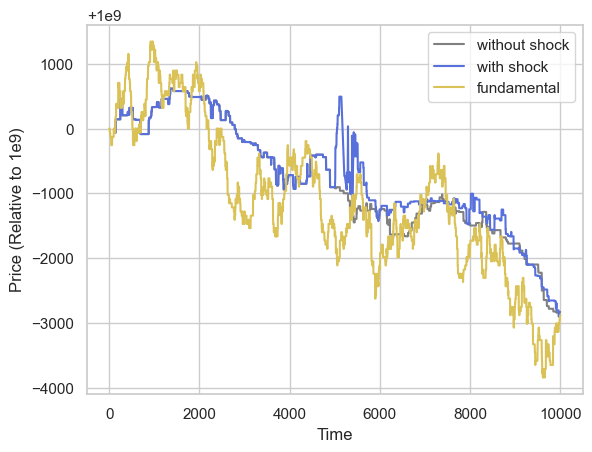

In [3]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"Trial {seed}")
    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")
    print()


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"Trial {seed}")
    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")
    print()


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.a/"

    # Show plot
    plt.savefig(base + f"6.1.a_{seed}_BUY.png")


Figure 6.1.b - Pg 62 top right

Notes: 
- same notes as for 6.1.a
- difference is that this graph enables ZI trader market observation 
- strategic_variance = 1e6, this is not explicitly defined in the thesis

Sell Side Shocks:

Trial 1
AVG No shock surplus: 156.7886505126953
No shock surplusses:[tensor(156.7887)]

Trial 1
AVG Shock surplus: 92.39200592041016
Shock surplusses:[tensor(92.3920)]

Trial 2
AVG No shock surplus: 190.74581909179688
No shock surplusses:[tensor(190.7458)]

Trial 2
AVG Shock surplus: 79.62865447998047
Shock surplusses:[tensor(79.6287)]

Trial 3
AVG No shock surplus: 183.31068420410156
No shock surplusses:[tensor(183.3107)]

Trial 3
AVG Shock surplus: 88.10023498535156
Shock surplusses:[tensor(88.1002)]

Trial 4
AVG No shock surplus: 158.49270629882812
No shock surplusses:[tensor(158.4927)]

Trial 4
AVG Shock surplus: 108.05929565429688
Shock surplusses:[tensor(108.0593)]

Trial 5
AVG No shock surplus: 161.84678649902344
No shock surplusses:[tensor(161.8468)]

Trial 5
AVG Shock surplus: 82.15877532958984
Shock surplusses:[tensor(82.1588)]

Trial 6
AVG No shock surplus: 209.25387573242188
No shock surplusses:[tensor(209.2539)]

Trial 6
AVG Shock surplus: 138.61402893066406
Shock surpluss

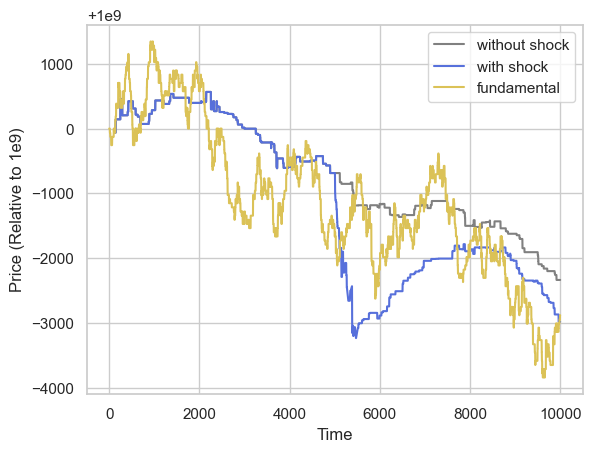

In [4]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))
    
    print(f"Trial {seed}")
    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")
    print()


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"Trial {seed}")
    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")
    print()


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.b/"

    # Show plot
    plt.savefig(base + f"6.1.b_{seed}_SELL.png")


Buy Side Shocks: 

Trial 1
AVG No shock surplus: 156.7886505126953
No shock surplusses:[tensor(156.7887)]

Trial 1
AVG Shock surplus: 78.48599243164062
Shock surplusses:[tensor(78.4860)]

Trial 2
AVG No shock surplus: 190.74581909179688
No shock surplusses:[tensor(190.7458)]

Trial 2
AVG Shock surplus: 144.57342529296875
Shock surplusses:[tensor(144.5734)]

Trial 3
AVG No shock surplus: 183.31068420410156
No shock surplusses:[tensor(183.3107)]

Trial 3
AVG Shock surplus: 119.16831970214844
Shock surplusses:[tensor(119.1683)]

Trial 4
AVG No shock surplus: 158.49270629882812
No shock surplusses:[tensor(158.4927)]

Trial 4
AVG Shock surplus: 118.39424133300781
Shock surplusses:[tensor(118.3942)]

Trial 5
AVG No shock surplus: 161.84678649902344
No shock surplusses:[tensor(161.8468)]

Trial 5
AVG Shock surplus: 130.47384643554688
Shock surplusses:[tensor(130.4738)]

Trial 6
AVG No shock surplus: 209.25387573242188
No shock surplusses:[tensor(209.2539)]

Trial 6
AVG Shock surplus: 97.9470443725586
Shock surp

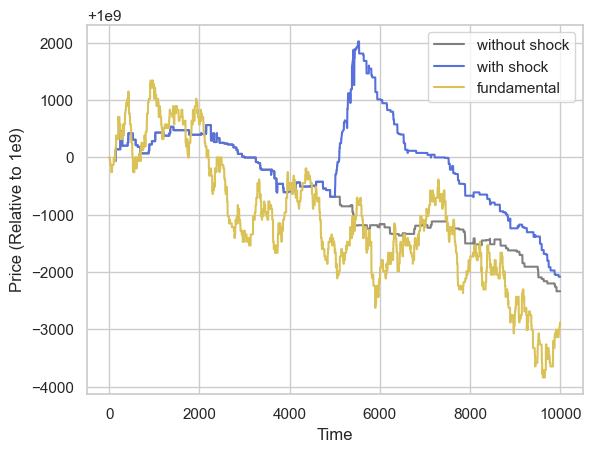

In [5]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []

    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_ns + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(f"Trial {seed}")
    print(f"AVG No shock surplus: {sum(surpluses_ns)/len(surpluses_ns)}")
    print(f"No shock surplusses:{surpluses_ns}")
    print()


    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim_s.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_s + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(f"Trial {seed}")
    print(f"AVG Shock surplus: {sum(surpluses_s)/len(surpluses_s)}")
    print(f"Shock surplusses:{surpluses_s}")
    print()


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.1.b/"

    # Show plot
    plt.savefig(base + f"6.1.b_{seed}_BUY.png")


Figure 6.2 - page 63

Notes: 
- Generating 2 plots, positive mispricing, negative mispricing
- taking averages of the data at each length, so absolute mispricing may not make sense
- need to get entire price and fundamental series, track lengths of trend, and add data points
- had to adjust some paramters for replication
- took averages over 200 run, capped graph at 20 length, because limited data beyond that


Positive Trends: 

Trial 1
AVG No trend surplus: 156.7886505126953
No trend surplusses:[tensor(156.7887)]

Trial 1
AVG trend surplus: 22.112884521484375
trend surplusses:[tensor(22.1129)]

Trial 2
AVG No trend surplus: 190.74581909179688
No trend surplusses:[tensor(190.7458)]

Trial 2
AVG trend surplus: 33.59493637084961
trend surplusses:[tensor(33.5949)]

Trial 3
AVG No trend surplus: 183.31068420410156
No trend surplusses:[tensor(183.3107)]

Trial 3
AVG trend surplus: 68.31515502929688
trend surplusses:[tensor(68.3152)]

Trial 4
AVG No trend surplus: 158.49270629882812
No trend surplusses:[tensor(158.4927)]

Trial 4
AVG trend surplus: 60.16736602783203
trend surplusses:[tensor(60.1674)]

Trial 5
AVG No trend surplus: 161.84678649902344
No trend surplusses:[tensor(161.8468)]

Trial 5
AVG trend surplus: 42.03837203979492
trend surplusses:[tensor(42.0384)]

Trial 6
AVG No trend surplus: 209.25387573242188
No trend surplusses:[tensor(209.2539)]

Trial 6
AVG trend surplus: 68.88595581054688
trend surplusses

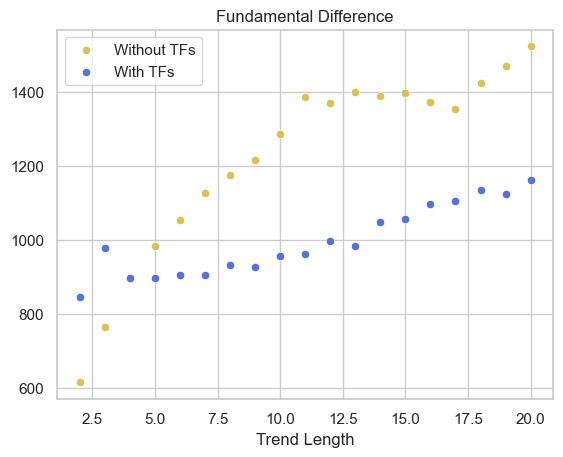

In [6]:
%%time

plot_no_trend = {}
plot_trend = {}


for seed in range(1, 300):

    surpluses_no_trend = []

    sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 0,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 0,
                random_seed = seed,
                )


    data_no_trend = sim_no_trend.run()
    fundamental_val_no_trend = sim_no_trend.markets[0].get_final_fundamental()
    values_no_trend = []

    for agent_id in sim_no_trend.agents:
        agent = sim_no_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_no_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_no_trend.append(value)
    surpluses_no_trend.append(sum(values_no_trend)/len(values_no_trend))

    print(f"Trial {seed}")
    print(f"AVG No trend surplus: {sum(surpluses_no_trend)/len(surpluses_no_trend)}")
    print(f"No trend surplusses:{surpluses_no_trend}")
    print()


    surpluses_trend = []

    sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=100,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 0,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 0,
                random_seed = seed,
                )


    data_trend = sim_trend.run()
    fundamental_val_trend = sim_trend.markets[0].get_final_fundamental()
    values_trend = []
    for agent_id in sim_trend.agents:
        agent = sim_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_trend.append(value)
    surpluses_trend.append(sum(values_trend)/len(values_trend))

    print(f"Trial {seed}")
    print(f"AVG trend surplus: {sum(surpluses_trend)/len(surpluses_trend)}")
    print(f"trend surplusses:{surpluses_trend}")
    print()


    _, _, _, f = data_no_trend
    # _, _, _, f = data_trend

    # generating mispricing datapoints

    # no_trend mispricing
    prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history() 
    trend_length = 0
    for i in range(1, len(prices_no_trend)):
        
        if prices_no_trend[i] > prices_no_trend[i-1]:
            trend_length = max(1, trend_length + 1)
        elif prices_no_trend[i] < prices_no_trend[i-1]:
            trend_length = min(-1, trend_length - 1)

        # plot_no_trend.append((trend_length, f[i] - prices_no_trend[i]))
        if trend_length >= 2:
            if times_no_trend[i] == len(f): continue
            
            if trend_length not in plot_no_trend.keys():
                plot_no_trend[trend_length] = (abs(f[times_no_trend[i]] - prices_no_trend[i]), 1)
            else:
                v, n = plot_no_trend[trend_length]
                plot_no_trend[trend_length] = ( (v*n + abs(f[times_no_trend[i]] - prices_no_trend[i])) /(n+1), n+1)
    
    # trend mispricing
    prices_trend, times_trend = sim_trend.get_transaction_history() 
    trend_length = 0
    
    for i in range(1, len(prices_trend)):
        
        if prices_trend[i] > prices_trend[i-1]:
            trend_length = max(1, trend_length + 1)
        elif prices_trend[i] < prices_trend[i-1]:
            trend_length = min(-1, trend_length - 1)

        # plot_no_trend.append((trend_length, f[i] - prices_no_trend[i]))
        if trend_length >= 2:
            if times_trend[i] == len(f): continue
            
            if trend_length not in plot_trend.keys():
                plot_trend[trend_length] = (abs(f[times_trend[i]] - prices_trend[i]), 1)
            else:
                v, n = plot_trend[trend_length]
                plot_trend[trend_length] = ( (v*n + abs(f[times_trend[i]] - prices_trend[i]))/(n+1), n+1)
    


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    if k > 20: continue

    X_nt.append(k)
    Y_nt.append(v[0])
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    if k > 20: continue

    X_t.append(k)
    Y_t.append(v[0])
    # print(k , v)


sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without TFs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With TFs")

# Set plot labels and title
plt.xlabel('Trend Length')
plt.ylabel('')
plt.title('Fundamental Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.2/"

# save plot
plt.savefig(base + f"6.2_positive_trend.png")


Nefative Trends: 

Trial 1
AVG No trend surplus: 156.7886505126953
No trend surplusses:[tensor(156.7887)]

Trial 1
AVG trend surplus: 22.112884521484375
trend surplusses:[tensor(22.1129)]

Trial 2
AVG No trend surplus: 190.74581909179688
No trend surplusses:[tensor(190.7458)]

Trial 2
AVG trend surplus: 33.59493637084961
trend surplusses:[tensor(33.5949)]

Trial 3
AVG No trend surplus: 183.31068420410156
No trend surplusses:[tensor(183.3107)]

Trial 3
AVG trend surplus: 68.31515502929688
trend surplusses:[tensor(68.3152)]

Trial 4
AVG No trend surplus: 158.49270629882812
No trend surplusses:[tensor(158.4927)]

Trial 4
AVG trend surplus: 60.16736602783203
trend surplusses:[tensor(60.1674)]

Trial 5
AVG No trend surplus: 161.84678649902344
No trend surplusses:[tensor(161.8468)]

Trial 5
AVG trend surplus: 42.03837203979492
trend surplusses:[tensor(42.0384)]

Trial 6
AVG No trend surplus: 209.25387573242188
No trend surplusses:[tensor(209.2539)]

Trial 6
AVG trend surplus: 68.88595581054688
trend surplusses

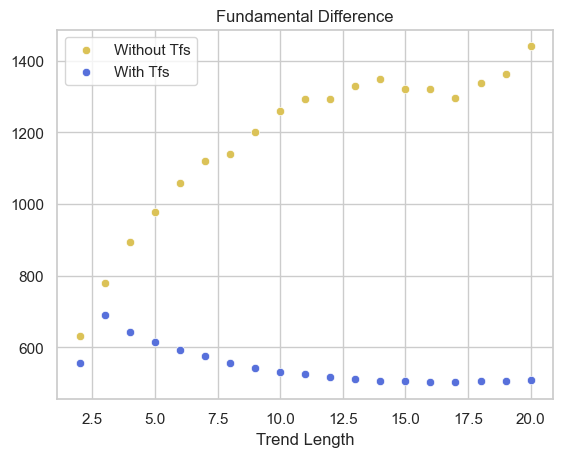

In [7]:
%%time

plot_no_trend = {}
plot_trend = {}

for seed in range(1, 300):
    
    surpluses_no_trend = []

    sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 0,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 0,
                random_seed = seed,
                )


    data_no_trend = sim_no_trend.run()
    fundamental_val_no_trend = sim_no_trend.markets[0].get_final_fundamental()
    values_no_trend = []

    for agent_id in sim_no_trend.agents:
        agent = sim_no_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_no_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_no_trend.append(value)
    surpluses_no_trend.append(sum(values_no_trend)/len(values_no_trend))

    print(f"Trial {seed}")
    print(f"AVG No trend surplus: {sum(surpluses_no_trend)/len(surpluses_no_trend)}")
    print(f"No trend surplusses:{surpluses_no_trend}")
    print()


    surpluses_trend = []

    sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=100,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 0,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 0,
                random_seed = seed,
                )


    data_trend = sim_trend.run()
    fundamental_val_trend = sim_trend.markets[0].get_final_fundamental()
    values_trend = []
    for agent_id in sim_trend.agents:
        agent = sim_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_trend.append(value)
    surpluses_trend.append(sum(values_trend)/len(values_trend))

    print(f"Trial {seed}")
    print(f"AVG trend surplus: {sum(surpluses_trend)/len(surpluses_trend)}")
    print(f"trend surplusses:{surpluses_trend}")
    print()


    _, _, _, f = data_no_trend
    # _, _, _, f = data_trend

 
    plt.clf()

    # generating mispricing datapoints

    # no_trend mispricing
    prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history() 

    trend_length = 0
    for i in range(1, len(prices_no_trend)):
        
        if prices_no_trend[i] > prices_no_trend[i-1]:
            trend_length = max(1, trend_length + 1)
        elif prices_no_trend[i] < prices_no_trend[i-1]:
            trend_length = min(-1, trend_length - 1)

        # plot_no_trend.append((trend_length, f[i] - prices_no_trend[i]))
        if trend_length <= -2:
            if times_no_trend[i] == len(f): continue
            
            if -trend_length not in plot_no_trend.keys():
                plot_no_trend[-trend_length] = (abs(f[times_no_trend[i]] - prices_no_trend[i]), 1)
            else:
                v, n = plot_no_trend[-trend_length]
                plot_no_trend[-trend_length] = ( (v*n + abs(f[times_no_trend[i]] - prices_no_trend[i]) ) /(n+1), n+1)
    
    # trend mispricing
    prices_trend, times_trend = sim_trend.get_transaction_history() 
    # print(len(f), len(prices_no_trend), len(times_no_trend))
    trend_length = 0
    for i in range(1, len(prices_trend)):
        
        if prices_trend[i] > prices_trend[i-1]:
            trend_length = max(1, trend_length + 1)
        elif prices_trend[i] < prices_trend[i-1]:
            trend_length = min(-1, trend_length - 1)

        # plot_no_trend.append((trend_length, f[i] - prices_no_trend[i]))
        if trend_length <= -2:

            if times_trend[i] == len(f): continue
            
            if -trend_length not in plot_trend.keys():
                plot_trend[-trend_length] = (abs(f[times_trend[i]] - prices_trend[i]), 1)
            else:
                v, n = plot_trend[-trend_length]
                plot_trend[-trend_length] = ( (v*n + abs(f[times_trend[i]] - prices_trend[i]))/(n+1), n+1)
    

# Plot using Seaborn and Matplotlib
sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    if k > 20: continue

    X_nt.append(k)
    Y_nt.append(v[0])
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    if k > 20: continue

    X_t.append(k)
    Y_t.append(v[0])
    # print(k , v)


sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Trend Length')
plt.ylabel('')
plt.title('Fundamental Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.2/"

# save plot
plt.savefig(base + f"6.2_negative_trend.png")

Figure 6.3 - page 64

Notes: 
- some parameters are not explicitly stated, these are either taken from defualts or inferred
- the randomness scheme wont generate consistent results here: 
    - by adding more agents, the random series is offset, there will no longer be matching fundamentals
    - had to use a modified non-lazy processs and pre generate values

Sell Side Shock:

Trial 1
AVG No Trend surplus: 34.07181930541992
No Trend surplusses:[tensor(34.0718)]

Trial 1
AVG Trend surplus: 3.3473494052886963
Trend surplusses:[tensor(3.3473)]

Trial 2
AVG No Trend surplus: 69.2695541381836
No Trend surplusses:[tensor(69.2696)]

Trial 2
AVG Trend surplus: 7.3617634773254395
Trend surplusses:[tensor(7.3618)]

Trial 3
AVG No Trend surplus: 25.529733657836914
No Trend surplusses:[tensor(25.5297)]

Trial 3
AVG Trend surplus: 7.504416465759277
Trend surplusses:[tensor(7.5044)]

Trial 4
AVG No Trend surplus: 54.69140625
No Trend surplusses:[tensor(54.6914)]

Trial 4
AVG Trend surplus: 8.653959274291992
Trend surplusses:[tensor(8.6540)]

Trial 5
AVG No Trend surplus: 40.80399703979492
No Trend surplusses:[tensor(40.8040)]

Trial 5
AVG Trend surplus: 11.637407302856445
Trend surplusses:[tensor(11.6374)]

Trial 6
AVG No Trend surplus: 145.2403564453125
No Trend surplusses:[tensor(145.2404)]

Trial 6
AVG Trend surplus: 14.507444381713867
Trend surplusses:[tensor(14.5074)

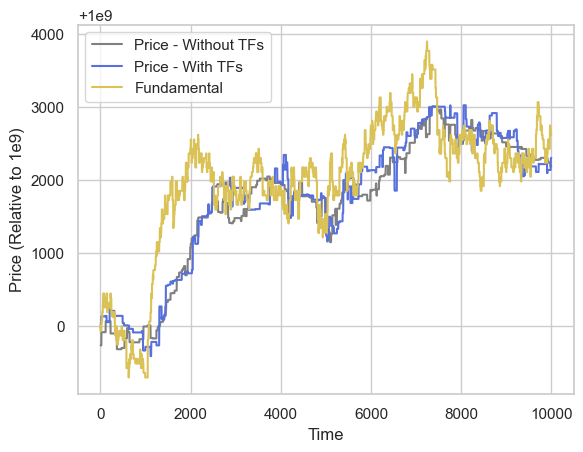

In [8]:
%%time

for seed in range(1, 30):

    surpluses_no_trend = []

    sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 30,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )


    data_no_trend = sim_no_trend.run()
    fundamental_val_no_trend = sim_no_trend.markets[0].get_final_fundamental()
    values_no_trend = []

    for agent_id in sim_no_trend.agents:
        agent = sim_no_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_no_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_no_trend.append(value)
    surpluses_no_trend.append(sum(values_no_trend)/len(values_no_trend))

    print(f"Trial {seed}")
    print(f"AVG No Trend surplus: {sum(surpluses_no_trend)/len(surpluses_no_trend)}")
    print(f"No Trend surplusses:{surpluses_no_trend}")
    print()


    surpluses_trend = []

    sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 30,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )

    data_trend = sim_trend.run()
    fundamental_val_trend = sim_trend.markets[0].get_final_fundamental()
    values_trend = []

    for agent_id in sim_trend.agents:
        agent = sim_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_trend.append(value)
    surpluses_trend.append(sum(values_trend)/len(values_trend))

    print(f"Trial {seed}")
    print(f"AVG Trend surplus: {sum(surpluses_trend)/len(surpluses_trend)}")
    print(f"Trend surplusses:{surpluses_trend}")
    print()

    Xnt, Ybnt, Yant, fnt = data_no_trend
    X, Yb, Ya, f = data_trend

    prices_nt = [(a + b) / 2 for a, b in zip(Ybnt, Yant)]
    prices = [(a + b) / 2 for a, b in zip(Yb, Ya)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_nt, color='gray', label='Price - Without TFs')
    sns.lineplot(data=prices, color=palette[5], label='Price - With TFs')
    sns.lineplot(data=fnt, color=palette[1], label='Fundamental')
    # sns.lineplot(data=f, color='green', label='Fundamental')


    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.3/"

    # Show plot
    plt.savefig(base + f"6.3_{seed}_SELL.png")


Buy Side Shock: 

Trial 1
AVG No Trend surplus: 62.05820083618164
No Trend surplusses:[tensor(62.0582)]

Trial 1
AVG Trend surplus: 6.145280361175537
Trend surplusses:[tensor(6.1453)]

Trial 2
AVG No Trend surplus: 72.44667053222656
No Trend surplusses:[tensor(72.4467)]

Trial 2
AVG Trend surplus: 14.04831600189209
Trend surplusses:[tensor(14.0483)]

Trial 3
AVG No Trend surplus: 7.86339807510376
No Trend surplusses:[tensor(7.8634)]

Trial 3
AVG Trend surplus: 8.675761222839355
Trend surplusses:[tensor(8.6758)]

Trial 4
AVG No Trend surplus: 40.490291595458984
No Trend surplusses:[tensor(40.4903)]

Trial 4
AVG Trend surplus: 7.24819278717041
Trend surplusses:[tensor(7.2482)]

Trial 5
AVG No Trend surplus: 29.63262367248535
No Trend surplusses:[tensor(29.6326)]

Trial 5
AVG Trend surplus: 12.905204772949219
Trend surplusses:[tensor(12.9052)]

Trial 6
AVG No Trend surplus: 125.8591537475586
No Trend surplusses:[tensor(125.8592)]

Trial 6
AVG Trend surplus: 9.962825775146484
Trend surplusses:[tensor(9.9628

KeyboardInterrupt: 

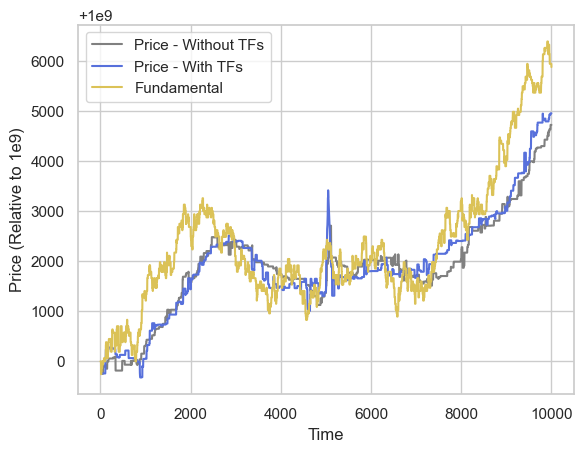

In [10]:
%%time

for seed in range(1, 30):

    surpluses_no_trend = []

    sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )


    data_no_trend = sim_no_trend.run()
    fundamental_val_no_trend = sim_no_trend.markets[0].get_final_fundamental()
    values_no_trend = []

    for agent_id in sim_no_trend.agents:
        agent = sim_no_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_no_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_no_trend.append(value)
    surpluses_no_trend.append(sum(values_no_trend)/len(values_no_trend))

    print(f"Trial {seed}")
    print(f"AVG No Trend surplus: {sum(surpluses_no_trend)/len(surpluses_no_trend)}")
    print(f"No Trend surplusses:{surpluses_no_trend}")
    print()


    surpluses_trend = []

    sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 100,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )

    data_trend = sim_trend.run()
    fundamental_val_trend = sim_trend.markets[0].get_final_fundamental()
    values_trend = []

    for agent_id in sim_trend.agents:
        agent = sim_trend.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val_trend + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_trend.append(value)
    surpluses_trend.append(sum(values_trend)/len(values_trend))

    print(f"Trial {seed}")
    print(f"AVG Trend surplus: {sum(surpluses_trend)/len(surpluses_trend)}")
    print(f"Trend surplusses:{surpluses_trend}")
    print()

    Xnt, Ybnt, Yant, fnt = data_no_trend
    X, Yb, Ya, f = data_trend

    prices_nt = [(a + b) / 2 for a, b in zip(Ybnt, Yant)]
    prices = [(a + b) / 2 for a, b in zip(Yb, Ya)]

    plt.clf()

    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_nt, color='gray', label='Price - Without TFs')
    sns.lineplot(data=prices, color=palette[5], label='Price - With TFs')
    sns.lineplot(data=fnt, color=palette[1], label='Fundamental')
    # sns.lineplot(data=f, color='green', label='Fundamental')


    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.3/"

    # Show plot
    plt.savefig(base + f"6.3_{seed}_BUY.png")
